In [1]:
import pandas as pd
from pydataset import data

import prepare
import acquire

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#Get titanic data
df = acquire.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
#Clean the data
new_df = prepare.clean_titanic(df)
new_df.drop(columns = ['sex','embark_town','class'], inplace =True)

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


In [6]:
train, validate, test = prepare.titanic_split_data(new_df)

In [7]:
train.shape, validate.shape, test.shape

((498, 8), (214, 8), (179, 8))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [9]:
#Set x and y for train
x_train = train.drop(columns='survived')
y_train = train[['survived']]

In [10]:
#Do the same for validate
#Set x and y for train
x_validate = validate.drop(columns='survived')
y_validate = validate[['survived']]

In [11]:
#1 is for those who survived and 0 is for those didnt survived
#we predict those survived
train['baseline_pred'] = 0
accuracy_score(train.survived, train.baseline_pred)

0.6164658634538153

In [12]:
baseline_class_report = classification_report(train.survived, train.baseline_pred, zero_division=True)
print(baseline_class_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.81      0.50      0.38       498
weighted avg       0.76      0.62      0.47       498



### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
print(f'Training score: {model.score(x_train, y_train): .2%}')
print(f'Validate score: {model.score(x_validate, y_validate): .2%}')

Training score:  94.58%
Validate score:  75.70%


In [15]:
train['model'] = model.predict(x_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_pred,model
583,0,1,0,0,40.1250,1,1,0,0,0,0
165,1,3,0,2,20.5250,0,1,0,1,0,1
50,0,3,4,1,39.6875,0,1,0,1,0,0
259,1,2,0,1,26.0000,0,0,0,1,0,1
306,1,1,0,0,110.8833,1,0,0,0,0,1


In [16]:
y_pred = model.predict(x_train)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
model.score(x_validate,y_validate)

0.7570093457943925

In [18]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index = ['Not Survive','Survive'], columns=['Pred Not','Pred Survived'])

,Pred Not,Pred Survived
Not Survive,305,2
Survive,25,166


In [19]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [20]:
precision_score(y_train, y_pred)

0.9880952380952381

In [21]:
accuracy_score(y_train, y_pred)

0.9457831325301205

In [22]:
recall_score(y_train, y_pred)

0.8691099476439791

In [23]:
f1_score(y_train, y_pred)

0.9247910863509748

Run through steps 2-4 using a different max_depth value.

[Text(167.4, 181.2, 'X[5] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(41.85, 36.23999999999998, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(209.25, 36.23999999999998, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]'),
 Text(292.95, 36.23999999999998, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]')]

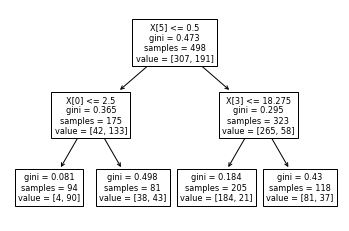

In [24]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(x_train, y_train)
plot_tree(model2)

### Which model performs better on your in-sample data?

In [25]:
model2.score(x_train, y_train)

0.7991967871485943

In [26]:
model2.score(x_validate, y_validate)

0.7616822429906542

In [27]:
train['model2'] = model2.predict(x_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_pred,model,model2
583,0,1,0,0,40.1250,1,1,0,0,0,0,0
165,1,3,0,2,20.5250,0,1,0,1,0,1,0
50,0,3,4,1,39.6875,0,1,0,1,0,0,0
259,1,2,0,1,26.0000,0,0,0,1,0,1,1
306,1,1,0,0,110.8833,1,0,0,0,0,1,1


In [28]:
y_pred_2 = model2.predict(x_train)

In [29]:
pd.DataFrame(confusion_matrix(y_train, y_pred_2), index = ['Not Survive','Survive'], columns=['Pred Not','Pred Survived'])

,Pred Not,Pred Survived
Not Survive,265,42
Survive,58,133


In [30]:
pd.DataFrame(classification_report(y_train, y_pred_2, output_dict=True)).T

,precision,recall,f1-score,support
0,0.820433,0.863192,0.841270,307.000000
1,0.760000,0.696335,0.726776,191.000000
accuracy,0.799197,0.799197,0.799197,0.799197
macro avg,0.790217,0.779764,0.784023,498.000000
weighted avg,0.797255,0.799197,0.797358,498.000000


### Which model performs best on your out-of-sample data, the validate set?

## Random Forest

### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10

In [31]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [32]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [33]:
y_pred = rf.predict(x_train)

In [34]:
y_pred_proba = rf.predict_proba(x_train)

### Evaluate your results using the model score, confusion matrix, and classification report.

In [35]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


In [36]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,301,6
1,22,169


In [37]:
tn = 300
tp = 168
fn = 23
fp = 7

In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.94      0.94      0.94       498



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [39]:
print(f'accuracy score is {accuracy_score(y_train, y_pred):.2%}')

accuracy score is 94.38%


In [40]:
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')

true positive rate is 0.3373493975903614


In [41]:
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')

true negative rate is 0.6024096385542169


In [42]:
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')

false positive rate is 0.014056224899598393


In [43]:
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')

false negative rate is 0.04618473895582329


In [44]:
print(f'recall score is {recall_score(y_train, y_pred):.2%}')

recall score is 88.48%


In [45]:
print(f'precision score is {precision_score(y_train, y_pred):.2%}')

precision score is 96.57%


In [46]:
print(f'f1 score is {f1_score(y_train, y_pred)}')

f1 score is 0.9234972677595629


### Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [47]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=7,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=7, random_state=123)

In [49]:
y_pred = rf.predict(x_train)
y_pred_proba = rf.predict_proba(x_train)

In [50]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.80


In [51]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,290,17
1,67,124


In [52]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.88      0.65      0.75       191

    accuracy                           0.83       498
   macro avg       0.85      0.80      0.81       498
weighted avg       0.84      0.83      0.82       498



In [90]:
tn = 290
tp = 124
fn = 67
fp = 17

In [91]:
print(f'accuracy score is {accuracy_score(y_train, y_pred):.2%}')
print(f'true positive rate is {tp / (tn + tp+fn+fp):.4f}')
print(f'true negative rate is {tn / (tn + tp+fn+fp):.4f}')
print(f'false positive rate is {fp / (tn + tp+fn+fp):.4f}')
print(f'false negative rate is {fn / (tn + tp+fn+fp):.4f}')
print(f'recall score is {recall_score(y_train, y_pred):.2%}')
print(f'precision score is {precision_score(y_train, y_pred):.2%}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

accuracy score is 73.69%
true positive rate is 0.2490
true negative rate is 0.5823
false positive rate is 0.0341
false negative rate is 0.1345
recall score is 54.45%
precision score is 70.27%
f1 score is 0.6135693215339234


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

# KNN

 ### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)`

In [92]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [93]:
y_pred = knn.predict(x_train)

In [94]:
y_pred_proba = knn.predict_proba(x_train)

### Evaluate your results using the model score, confusion matrix, and classification report.

In [95]:
print(f'Model score: {knn.score(x_train,y_train):.2f}')

Model score: 0.82


In [96]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,286,21
1,70,121


In [97]:
pd.DataFrame(classification_report(y_train, y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,0.803371,0.931596,0.862745,307.000000
1,0.852113,0.633508,0.726727,191.000000
accuracy,0.817269,0.817269,0.817269,0.817269
macro avg,0.827742,0.782552,0.794736,498.000000
weighted avg,0.822065,0.817269,0.810577,498.000000


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [98]:
tp = 123
tn = 286
fp = 68
fn = 21

In [99]:
print(f'accuracy score is {accuracy_score(y_train, y_pred):.2%}')
print(f'true positive rate is {tp / (tn + tp+fn+fp):.2f}')
print(f'true negative rate is {tn / (tn + tp+fn+fp):.2f}')
print(f'false positive rate is {fp / (tn + tp+fn+fp):.2f}')
print(f'false negative rate is {fn / (tn + tp+fn+fp):.2f}')
print(f'recall score is {recall_score(y_train, y_pred):.2%}')
print(f'precision score is {precision_score(y_train, y_pred):.2%}')
print(f'f1 score is {f1_score(y_train, y_pred):.2f}')

accuracy score is 81.73%
true positive rate is 0.25
true negative rate is 0.57
false positive rate is 0.14
false negative rate is 0.04
recall score is 63.35%
precision score is 85.21%
f1 score is 0.73


### Run through steps 2-4 setting k to 10

### Run through setps 2-4 setting k to 20

In [100]:
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn10.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [101]:
y_pred = knn10.predict(x_train)

In [102]:
y_pred_proba = knn10.predict_proba(x_train)

In [103]:
#model score
print(f'{knn10.score(x_train,y_train):.2f}')

0.78


In [104]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,267,40
1,68,123


In [105]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       307
           1       0.75      0.64      0.69       191

    accuracy                           0.78       498
   macro avg       0.78      0.76      0.76       498
weighted avg       0.78      0.78      0.78       498



In [106]:
tp = 123
tn = 267
fp = 68
fn = 40

In [107]:
print ('Setting k to 10')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_train, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_train, y_pred)}')
print(f'precision score is {precision_score(y_train, y_pred)}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

Setting k to 10
---------------
accuracy score is 0.7831325301204819
true positive rate is 0.2469879518072289
true negative rate is 0.536144578313253
false positive rate is 0.13654618473895583
false negative rate is 0.08032128514056225
recall score is 0.643979057591623
precision score is 0.754601226993865
f1 score is 0.6949152542372882


In [108]:
knn20 = KNeighborsClassifier(n_neighbors = 20)
knn20.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [109]:
y_pred = knn20.predict(x_train)

In [110]:
y_pred_proba = knn20.predict_proba(x_train)

In [111]:
#model score
print(f'{knn20.score(x_train,y_train):.2f}')

0.74


In [112]:
#confusion matrix
print(confusion_matrix(y_train, y_pred))

[[263  44]
 [ 87 104]]


In [113]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       307
           1       0.70      0.54      0.61       191

    accuracy                           0.74       498
   macro avg       0.73      0.70      0.71       498
weighted avg       0.73      0.74      0.73       498



In [114]:
tp = 104
tn = 263
fp = 87
fn = 44

In [115]:
print ('Setting k to 20')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_train, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_train, y_pred)}')
print(f'precision score is {precision_score(y_train, y_pred)}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

Setting k to 20
---------------
accuracy score is 0.7369477911646586
true positive rate is 0.20883534136546184
true negative rate is 0.5281124497991968
false positive rate is 0.1746987951807229
false negative rate is 0.08835341365461848
recall score is 0.5445026178010471
precision score is 0.7027027027027027
f1 score is 0.6135693215339234


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### Which model performs best on our out-of-sample data from validate?

In [116]:
print('Accuracy of KNN classifier on training set n_neighbors set to 5: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 5: {:.2f}\n'
     .format(knn.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on training set n_neighbors set to 10: {:.2f}'
     .format(knn10.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 10: {:.2f}\n'
     .format(knn10.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on training set n_neighbors set to 20: {:.2f}'
     .format(knn20.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 20: {:.2f}'
     .format(knn20.score(x_validate, y_validate)))

Accuracy of KNN classifier on training set n_neighbors set to 5: 0.82
Accuracy of KNN classifier on validate set with n_neighbors set to 5: 0.73

Accuracy of KNN classifier on training set n_neighbors set to 10: 0.78
Accuracy of KNN classifier on validate set with n_neighbors set to 10: 0.71

Accuracy of KNN classifier on training set n_neighbors set to 20: 0.74
Accuracy of KNN classifier on validate set with n_neighbors set to 20: 0.67


# Logistic Regression

### Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [25]:
df = acquire.get_titanic_data()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [27]:
new_df = prepare.prep_titanic(df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 714 non-null    int64  
 1   pclass                   714 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    714 non-null    int64  
 4   parch                    714 non-null    int64  
 5   fare                     714 non-null    float64
 6   alone                    714 non-null    int64  
 7   sex_male                 714 non-null    uint8  
 8   embark_town_Queenstown   714 non-null    uint8  
 9   embark_town_Southampton  714 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 46.7 KB


In [28]:
train, validate, test = prepare.titanic_split_data(new_df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 652 to 834
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 399 non-null    int64  
 1   pclass                   399 non-null    int64  
 2   age                      399 non-null    float64
 3   sibsp                    399 non-null    int64  
 4   parch                    399 non-null    int64  
 5   fare                     399 non-null    float64
 6   alone                    399 non-null    int64  
 7   sex_male                 399 non-null    uint8  
 8   embark_town_Queenstown   399 non-null    uint8  
 9   embark_town_Southampton  399 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 26.1 KB


In [29]:
#Picked columns we going to use for x and y
x_cols= ['pclass','age','fare']
y_cols = 'survived'

In [30]:
x_train, y_train = train[x_cols], train[y_cols]
x_validate, y_validate = validate[x_cols], validate[y_cols]
x_test, y_test = train[x_cols], train[y_cols]

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 652 to 834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  399 non-null    int64  
 1   age     399 non-null    float64
 2   fare    399 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 12.5 KB


In [32]:
#the baselined is survived = 0
train['baseline'] = 0

In [33]:
print(f'The baseline accuracy for nonsurvival in all cases on the Titanic Dataset is {(train.baseline == train.survived).mean():.3}')

The baseline accuracy for nonsurvival in all cases on the Titanic Dataset is 0.594


In [34]:
logit =LogisticRegression(C=1.0 , random_state=123)
logit.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [35]:
#use the model to make predictions
y_pred = logit.predict(x_train)

In [36]:
print('Accuracy: {:.2%}'.format(logit.score(x_train, y_train)))

Accuracy: 69.92%


In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       237
           1       0.66      0.52      0.59       162

    accuracy                           0.70       399
   macro avg       0.69      0.67      0.67       399
weighted avg       0.69      0.70      0.69       399



In [38]:
print(f'training score: {logit.score(x_train, y_train):.2%}')
print(f'validate score: {logit.score(x_validate, y_validate):.2%}')

training score: 69.92%
validate score: 69.19%


### Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [39]:
x_cols = ['age','pclass', 'fare', 'sex_male']
y_col = 'survived'

x_train, y_train = train[x_cols], train[y_col]
x_validate, y_validate = validate[x_cols], validate[y_col]
x_test, y_test = test[x_cols], test[y_col]

In [40]:
logit2 =LogisticRegression(C=1.0 , random_state=123)
logit2.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [41]:
print(f'training score: {logit2.score(x_train, y_train):.2%}')
print(f'validate score: {logit2.score(x_validate, y_validate):.2%}')

training score: 78.70%
validate score: 76.74%


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       237
           1       0.66      0.52      0.59       162

    accuracy                           0.70       399
   macro avg       0.69      0.67      0.67       399
weighted avg       0.69      0.70      0.69       399



### Try out other combinations of features and models.

In [131]:
x_cols = ['age','pclass', 'fare','sex_male', 'sibsp']
y_col = 'survived'

x_train, y_train = train[x_cols], train[y_col]
x_validate, y_validate = validate[x_cols], validate[y_col]
x_test, y_test = test[x_cols], test[y_col]

In [97]:
logit3 =LogisticRegression(C=1.0 , random_state=123)
logit3.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [79]:
y_pred = logit3.predict(x_train)

In [80]:
print(confusion_matrix(y_train, y_pred))

[[210  27]
 [ 47 115]]


In [81]:
tp = 109
tn = 123
fp = 53
fn = 114

In [82]:
print ('Setting model 3')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_train, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_train, y_pred)}')
print(f'precision score is {precision_score(y_train, y_pred)}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

Setting model 3
---------------
accuracy score is 0.8145363408521303
true positive rate is 0.2731829573934837
true negative rate is 0.3082706766917293
false positive rate is 0.13283208020050125
false negative rate is 0.2857142857142857
recall score is 0.7098765432098766
precision score is 0.8098591549295775
f1 score is 0.756578947368421


In [83]:
print(f'training score: {logit3.score(x_train, y_train):.2%}')
print(f'validate score: {logit3.score(x_validate, y_validate):.2%}')

training score: 81.45%
validate score: 78.49%


In [117]:
x_cols = ['age','pclass', 'fare', 'sibsp','parch']
y_col = 'survived'

x_train, y_train = train[x_cols], train[y_col]
x_validate, y_validate = validate[x_cols], validate[y_col]
x_test, y_test = test[x_cols], test[y_col]

In [54]:
logit4 =LogisticRegression(C=1.0 ,class_weight='balanced' , random_state=123)
logit4.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [84]:
y_pred = logit4.predict(x_train)

In [85]:
print(confusion_matrix(y_train, y_pred))

[[171  66]
 [ 49 113]]


In [86]:
tp = 113
tn = 171
fp = 49
fn = 66

In [87]:
print(f'training score: {logit4.score(x_train, y_train):.2%}')
print(f'validate score: {logit4.score(x_validate, y_validate):.2%}')

training score: 71.18%
validate score: 68.60%


In [88]:
print ('Setting model 4')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_train, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_train, y_pred)}')
print(f'precision score is {precision_score(y_train, y_pred)}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

Setting model 4
---------------
accuracy score is 0.7117794486215538
true positive rate is 0.2832080200501253
true negative rate is 0.42857142857142855
false positive rate is 0.12280701754385964
false negative rate is 0.16541353383458646
recall score is 0.6975308641975309
precision score is 0.6312849162011173
f1 score is 0.6627565982404693


In [137]:
x_cols = ['age','pclass', 'fare', 'sibsp','alone']
y_col = 'survived'

x_train, y_train = train[x_cols], train[y_col]
x_validate, y_validate = validate[x_cols], validate[y_col]
x_test, y_test = test[x_cols], test[y_col]

In [90]:
logit5 =LogisticRegression(C=1.0 ,class_weight='balanced' , random_state=123)
logit5.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [91]:
y_pred = logit5.predict(x_train)

In [92]:
print(confusion_matrix(y_train, y_pred))

[[177  60]
 [ 52 110]]


In [93]:
tp = 177
tn = 171
fp = 52
fn = 60

In [94]:
print ('Setting model 5')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_train, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_train, y_pred)}')
print(f'precision score is {precision_score(y_train, y_pred)}')
print(f'f1 score is {f1_score(y_train, y_pred)}')

Setting model 5
---------------
accuracy score is 0.7192982456140351
true positive rate is 0.3847826086956522
true negative rate is 0.3717391304347826
false positive rate is 0.11304347826086956
false negative rate is 0.13043478260869565
recall score is 0.6790123456790124
precision score is 0.6470588235294118
f1 score is 0.6626506024096386


In [95]:
print(f'training score: {logit5.score(x_train, y_train):.2%}')
print(f'validate score: {logit5.score(x_validate, y_validate):.2%}')

training score: 71.93%
validate score: 68.60%


### Use you best 3 models to predict and evaluate on your validate sample.

In [101]:
logit3 =LogisticRegression(C=1.0 , random_state=123)
logit3.fit(x_validate, y_validate)

LogisticRegression(random_state=123)

In [102]:
y_pred = logit3.predict(x_validate)

In [104]:
print(confusion_matrix(y_validate, y_pred))

[[89 13]
 [25 45]]


In [66]:
tp = 45
tn = 89
fp = 25
fn = 13

In [106]:
print ('Setting model 3 for validate')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_validate, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_validate, y_pred)}')
print(f'precision score is {precision_score(y_validate, y_pred)}')
print(f'f1 score is {f1_score(y_validate, y_pred)}')

Setting model 3 for validate
---------------
accuracy score is 0.7790697674418605
true positive rate is 0.3847826086956522
true negative rate is 0.3717391304347826
false positive rate is 0.11304347826086956
false negative rate is 0.13043478260869565
recall score is 0.6428571428571429
precision score is 0.7758620689655172
f1 score is 0.703125


In [122]:
logit4 =LogisticRegression(C=1.0 ,class_weight='balanced' , random_state=123)
logit4.fit(x_validate, y_validate)

LogisticRegression(class_weight='balanced', random_state=123)

In [123]:
y_pred = logit4.predict(x_validate)
print(confusion_matrix(y_validate, y_pred))

[[75 27]
 [23 47]]


In [124]:
tp = 47
tn = 75
fp = 27
fn = 23

In [125]:
print ('Setting model 4 for validate')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_validate, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_validate, y_pred)}')
print(f'precision score is {precision_score(y_validate, y_pred)}')
print(f'f1 score is {f1_score(y_validate, y_pred)}')

Setting model 4 for validate
---------------
accuracy score is 0.7093023255813954
true positive rate is 0.27325581395348836
true negative rate is 0.436046511627907
false positive rate is 0.1569767441860465
false negative rate is 0.13372093023255813
recall score is 0.6714285714285714
precision score is 0.6351351351351351
f1 score is 0.6527777777777778


In [138]:
logit5 =LogisticRegression(C=1.0 ,class_weight='balanced' , random_state=123)
logit5.fit(x_validate, y_validate)

LogisticRegression(class_weight='balanced', random_state=123)

In [139]:
y_pred = logit5.predict(x_validate)
print(confusion_matrix(y_validate, y_pred))

[[80 22]
 [26 44]]


In [140]:
tp = 44
tn = 80
fp = 26
fn = 22

In [141]:
print ('Setting model 5 for validate')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_validate, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_validate, y_pred)}')
print(f'precision score is {precision_score(y_validate, y_pred)}')
print(f'f1 score is {f1_score(y_validate, y_pred)}')

Setting model 5 for validate
---------------
accuracy score is 0.7209302325581395
true positive rate is 0.2558139534883721
true negative rate is 0.46511627906976744
false positive rate is 0.1511627906976744
false negative rate is 0.12790697674418605
recall score is 0.6285714285714286
precision score is 0.6666666666666666
f1 score is 0.6470588235294118


### Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [132]:
#Model 3 has the best accuracy
logit3 =LogisticRegression(C=1.0 , random_state=123)
logit3.fit(x_test, y_test)

LogisticRegression(random_state=123)

In [135]:
y_pred = logit3.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[74 11]
 [10 48]]


In [142]:
tp = 48
tn = 74
fp = 10
fn = 11

In [143]:
print ('Setting model 3 for test')
print( '---------------')
print(f'accuracy score is {accuracy_score(y_validate, y_pred)}')
print(f'true positive rate is {tp / (tn + tp+fn+fp)}')
print(f'true negative rate is {tn / (tn + tp+fn+fp)}')
print(f'false positive rate is {fp / (tn + tp+fn+fp)}')
print(f'false negative rate is {fn / (tn + tp+fn+fp)}')
print(f'recall score is {recall_score(y_validate, y_pred)}')
print(f'precision score is {precision_score(y_validate, y_pred)}')
print(f'f1 score is {f1_score(y_validate, y_pred)}')

Setting model 3 for test
---------------
accuracy score is 0.7209302325581395
true positive rate is 0.3356643356643357
true negative rate is 0.5174825174825175
false positive rate is 0.06993006993006994
false negative rate is 0.07692307692307693
recall score is 0.6285714285714286
precision score is 0.6666666666666666
f1 score is 0.6470588235294118


In [ ]:
We can see a drop off in accuracy score from 78% validate sample to 72% test sample. But 